# Decision Tree for Medical Drug Prediction
#### Using previous medical data to predict what drug an unknown patient would need. 

In brief summary, the decision tree with max best tree leaf discovered some trends as follows:
* Model accuracy score with criterion gini index: 0.5667
* Criterion entropy also had a 0.5667.
<br> <br> No major overfitting was detected as the test and train set gave similiar results.

-----

The original dataset csv can be found on Kaggle: https://www.kaggle.com/prathamtripathi/drug-classification. Project based in IBM Decision Trees Lab for the course Machine Learning with Python. The original dataset columns and first five rows can be viewed below:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#file=r'/kaggle/input/drug-classification/drug200.csv' # Kaggle version
file=r'C:\Users\sschm\Desktop\Kaggle\drug200.csv' # Jypiter version
data=pd.read_csv(file) 
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Examine Drug Y Variable

AxesSubplot(0.125,0.125;0.775x0.755)


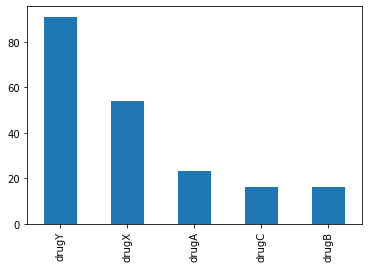

In [3]:
drugCount=data['Drug'].value_counts(ascending=False).plot(kind='bar');
print(drugCount)

## Find missing data
There was no missing data on our csv files. This is good news and means the researchers have collected some good data!

In [4]:
print("Missing data by column:")
findNA=data.isnull().sum().sort_values(ascending=False)/len(data)
print(findNA) #There are no missing values

Missing data by column:
Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64


## Feature Engineer X and Y
One can change the four drugs into numeric values: DrugY drugC drugX  drugB into numbers using: <br>
`df.replace({0: 10, 1: 100})` 

In [5]:
X=data.drop('Drug', axis=1)
y=data['Drug']
#y=data['Drug'].replace({'DrugY': 0, 'drugC':1, 'drugA':2, 'drugX':3, 'drugB':4}).astype(int)
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Split Data
Split the data set into training data and test data with 70% data and 30% being used as a way to test the results.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Feature Engineering
Encode Categorical Variables is needed for this dataset since there are many important variables that are numeric. Normally, decision trees are good for categorical features. 

In [7]:
import category_encoders as ce
#encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=X.columns)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## DecisionTreeClassifier with gini index
Model accuracy score with criterion gini index: 0.5667
The best max_depth with least amount of error is 3 when you call the calcDepth function.

In [8]:
from sklearn.tree import DecisionTreeClassifier

def get_mae(best_max_depth, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

def calcDepth():
    candidate_max_leaf_nodes = [3, 5, 10, 15, 200, 500]
    maeDic={} #dictionary  key=leaf  mae=value
    for leaf in candidate_max_leaf_nodes:
        mae=get_mae(leaf, X_train, X_test, y_train, y_test)
        maeDic[leaf]=mae

    best_max_depth = sorted(maeDic, key=lambda x : maeDic[x])[0]
    print(best_max_depth, " best_max_depth")

#calcDepth()
best_max_depth=3

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4500


## Overfiting and underfiting
Does the training results seem to give similiar results as the real test data? 
Overfit means that the train results are too good and not realistic. Underfitting means that the train data seems to have underperformed the actual result. For more information on overfitting, one should research trade/bias tradeoff.

In [9]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5786
Test set score: 0.4500


Because the test score is about 10% lower, there seems to be some indication that the data is slighty underfit. But overall, the two numbers are similiar.

## Visualize decision tree 
For more information on using graphviz, the official documentation be be found here:
https://graphviz.readthedocs.io/en/stable/manual.html

[Text(334.8, 380.52, 'X[2] <= 1.5\ngini = 0.692\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(167.4, 271.8, 'X[4] <= 100.0\ngini = 0.628\nsamples = 57\nvalue = [16, 13, 0, 0, 28]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 1.5\ngini = 0.656\nsamples = 44\nvalue = [16, 11, 0, 0, 17]'),
 Text(41.85, 54.360000000000014, 'gini = 0.595\nsamples = 22\nvalue = [6, 4, 0, 0, 12]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.64\nsamples = 22\nvalue = [10, 7, 0, 0, 5]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 39.0\ngini = 0.26\nsamples = 13\nvalue = [0, 2, 0, 0, 11]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 8]'),
 Text(292.95, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 0, 0, 3]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 2.5\ngini = 0.599\nsamples = 83\nvalue = [0, 0, 10, 36, 37]'),
 Text(418.5, 163.07999999999998, 'X[3] <= 1.5\ngini = 0.631\nsamples = 41\nvalue = [0, 0, 10, 11, 20]'),
 Text(376.650

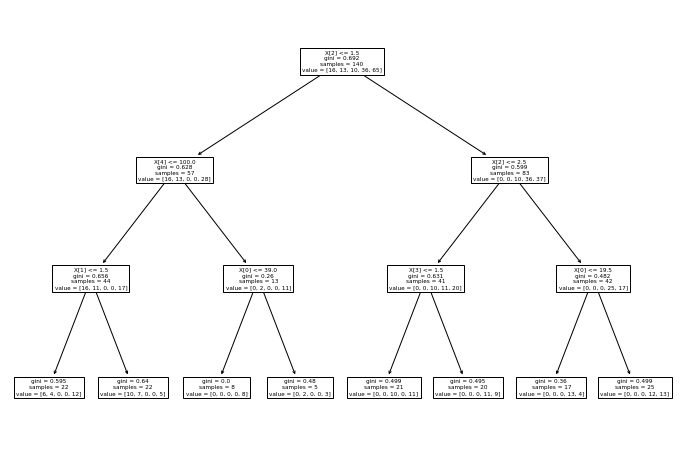

In [10]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

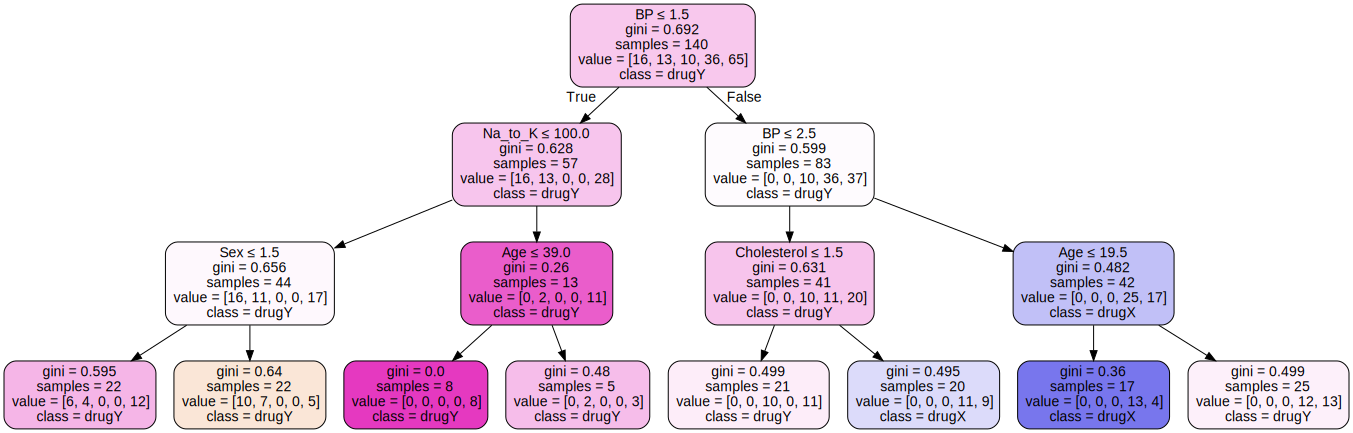

In [11]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

## Confusion Matrix
An easy way to describe a confusion matrix by an image I found on a towarddatascience.com:
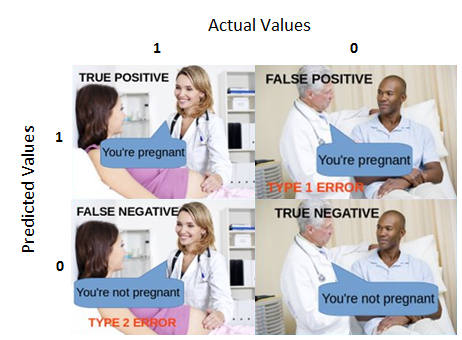

In [12]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 4  0  0  0  3]
 [ 2  0  0  0  1]
 [ 0  0  0  0  6]
 [ 0  0  0 11  7]
 [ 6  0  0  8 12]]


## Decision Tree Classifier with criterion entropy 
The entropy seems to give the same measurement as the gini index. Therefore, I do not go into much other detail outside of just running the report. There seems to be no major overfitting/underfitting as the train and test score are similiar within reason.

In [13]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

#Compare the train-set and test-set accuracy to check for overfitting.
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Model accuracy score with criterion entropy: 0.5000
Training set score: 0.5714
Test set score: 0.5000


## Make Final Prediction!

In [14]:
print(y_pred_en)

['drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugA' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugY' 'drugA' 'drugX' 'drugA' 'drugX'
 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugX' 'drugA' 'drugA'
 'drugX' 'drugY' 'drugA' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugY' 'drugY' 'drugA' 'drugX' 'drugX' 'drugX' 'drugX' 'drugA'
 'drugX' 'drugX' 'drugA' 'drugA' 'drugX' 'drugY']


## References:
* https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial
* https://www.datacamp.com/community/tutorials/decision-tree-classification-python
* https://www.kaggle.com/husnakhan/drug-prediction-classification